                 sepal-length  sepal-width  petal-length  petal-width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026
   sepal-length  sepal-width  petal-length  petal-width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


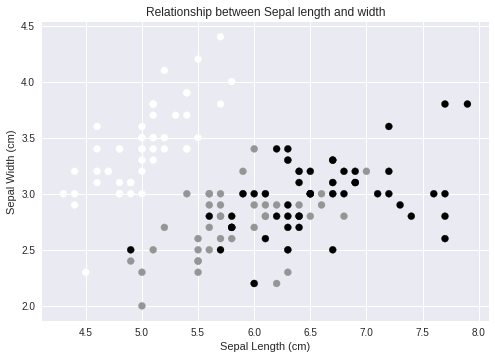

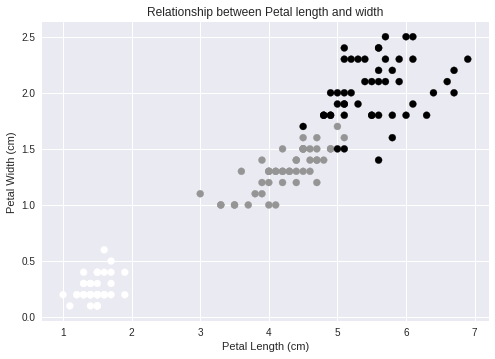

     sepal-length  sepal-width  petal-length  petal-width
138           6.0          3.0           4.8          1.8
124           6.7          3.3           5.7          2.1
5             5.4          3.9           1.7          0.4
28            5.2          3.4           1.4          0.2
27            5.2          3.5           1.5          0.2
138    2
124    2
5      0
28     0
27     0
Name: species, dtype: int64
Number of data points in the training set is:  120
Number of data points in the testing set is:   30
     sepal-length  sepal-width  petal-length  petal-width
116           6.5          3.0           5.5          1.8
64            5.6          2.9           3.6          1.3
82            5.8          2.7           3.9          1.2
70            5.9          3.2           4.8          1.8
33            5.5          4.2           1.4          0.2
116    2
64     1
82     1
70     1
33     0
Name: species, dtype: int64
[1 2 2 1 1 1 1 2 1 1 1 1 0 0 0 0 0 2 0 2 2 0 0 1 1 0 2 1 

In [2]:

# coding: utf-8

# # The power of predictive analysis
# 
# This notebook will walk through an example of how we use Machine Learning to provide very powerful predictions after learning the patterns in a dataset. 
# 
# The dataset we use in this example is a famous dataset of Iris flowers. There are three distinct species in the dataset:
#     
#     Iris Setosa
#     Iris Virginica
#     Iris Versicolor
#     
# As we move along this example, keep in mind that our end goal is to be able to create a model that will take in the measurement features of a flower species' datapoint, and be able to predict, with high accuracy, which species of flower this is.
# 
# We aim to make this walkthrough as followable as possible.

# ## 1. Import libraries to help with our program and access our data
# 
# There are many libraries in python that one can import into their own program. These are basically pre-written pieces of code that will work with parts of our program so that we do not have to worry about it. 
# 
# Think about opening a web brower on your computer by clicking its icon. There are a slew of things going on in the background, but we do not have to worry about that. Importing libraries to our program is a similar abstraction.
# 
# The libraries that we import are
# 
#  - _pandas (**Pan**el **Da**ta) - Analytical library for panel data. Think excel._
#  
#  - _pyplot (**Py**thon **Plot**ting) - library for visualisations._ 


import pandas as pd
import matplotlib.pyplot as plt


# ### Read the dataset into our program
# 
# Now that we have imported our libraries, let's use the pandas library, and its method 'read_csv', to load in our Iris flower dataset. This method the file path of the dataset as an argument. There are many other arguments we can use but these are not important at the moment.


iris = pd.read_csv('iris.csv')


# ### Observe our data
# 
# It is always a good idea to check what the data looks like before carrying out any analysis. We use a few more methods below to observe this dataset. Run each cell, one by one, to see what the method does.
# 
# One important thing to note here is that in the cell above, we have set **iris** equal to the pandas method that reads the data in. This means that we can now refer to our Iris Flower dataset as **iris**. We therefore call all of our methods on **iris**.
# 
# Calling a method on an object in most programming languages is usually done with the following syntax:
# 
#     object.method()
#     
# So in our example, calling the method **copy()** on the **iris** dataset object would be done as follows:
# 
#     iris.copy()
#     
# This would create a copy of our iris dataset.

# ### Check the format of the data
# 
# The **head()** method prints out the first 5 rows of our dataset. If we call this method, we can see that each row has 5 columns


print(iris.head())


# so, as we can now see, our dataset has 4 features for each data point. These are:
# 
#     sepal length
#     sepal width
#     petal length
#     petal width
#     
# The final column in the dataset is going to be our label, or predictor, column. This is due to the fact that we are predicting the species of the flower given the other details of the row.
# 
# To remind you of our end goal, we want to create a model that will do the following

# ![title](img/model_sketch1.png)

# ## 2. Explore our dataset
# 
# Now that we know we have the correct dataset in a format that we can work with, we can further explore our dataset to see if we can, ourselves, spot any patterns.
# 
# ### Check the average values for each species
# 
# Can we see any patterns in the dataset based on the **average** values of **each species**'?


print(iris.groupby('species').mean())


# Whilst it looks like there are patterns in the measurements depending on the species, it's a lot easier to see any patterns once the data has been plotted on a graph.
# 
# But before we plot data, notice that the species of the flowers are written as 'Iris-setosa'. Computers prefer numbers to work with, and when we come to our training our model, we will need to have the label column **species** as a number. So let's quickly convert our species to numbers based on the following mapping:
# 
#     setosa     --> 0
#     versicolor --> 1
#     virginica  --> 2
#     
# The code is fairly involved for a new-comer, and it's not the most efficient way of doing this, but suffices for smaller datasets. Do not worry about glazing past this. All it does is the mapping we have stated directly above.


for index, row in iris.iterrows():
    if row.species == 'Iris-setosa' or row.species == 0:
        iris.iloc[index, 4] = 0
    elif row.species == 'Iris-versicolor' or row.species == 1:
        iris.iloc[index, 4] = 1
    else:
        iris.iloc[index, 4] = 2

print(iris.head())


# ### Plot data
# 
# The code below splits each column and names it based on the column name. 


sepal_length = iris.iloc[:, 0]
sepal_width = iris.iloc[:, 1]

petal_length = iris.iloc[:, 2]
petal_width = iris.iloc[:, 3]

species = iris.iloc[:, 4]


# ### Relationship between sepal measurements and species?
# 
# In the following plots, the colour mappings are:
# 
#     purple --> setosa
#     green  --> versicolor
#     yellow --> virginica


plt.scatter(sepal_length, sepal_width, c=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Relationship between Sepal length and width')
plt.show()


# It looks like there is a relatively good distinction between each species and their sepal measurements. The species represented by the purple dots, the setosa species, looks like it is completely separable from the other two species. The other two species, however, are somewhat intertwined

# ### Relationship between petal measurements and species?


plt.scatter(petal_length, petal_width, c=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Relationship between Petal length and width')
plt.show()


# A similar conclusion can be drawn between the petal measurements and the respective species. It looks like the species represented by the purple dots, again, the setosa species, is very clearly seperable from the other species. The other two species, this time, look like they are a bit more separable. 

# ## 3. Arrange our data for our model
# 
# Now that we have seen that there are patterns in the data, we are in a fantastic place to place to make predictive models. Note, however, that many real datasets do not have such clear-cut patterns, and one of the jobs of a data scientist is to actually find these patterns. This can be done by working with the original dataset or expanding it using statistical techniques.
# 
# Before we forget the reason we are doing this. A brief reminderof what we want our model to do
# 
# **Input features:**
# 
#     Sepal Length
#     Sepal Width
#     Petal Length
#     Petal Width
#     
# **Output label:**
# 
#     Prediction of what species this flower is based on the input measurements

# We first, however, import a few more libraries that will help us in this section and the next:
# 
#  - _sklearn (__S__cience kit learning) - holds numerous machine learning and other methods._


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression


# An explanation as to what these specific imports do
# 
# - train_test_split: _A method splits our whole dataset into two datasets. One for training our model and one for testing our model._
# - shuffle: _rearranges the ordering of our datasets_
# - LogisticRegression: _A class that acts as our learning model for this dataset._

# ### We first need to split our dataset into a set of data features and a label
# 
#  - Features: **(sepal length, sepal width, petal length, petal width)**
#  - Label:     **(species)** 


# This just rearranges the rows in the dataset so our species aren't all bunched together. 
iris = shuffle(iris)

features = iris.iloc[:, :4]
labels = iris.iloc[:, 4]


# So our features look like this:


print(features.head())


# and our labels look like this:


print(labels.head())


# ### Split our features and label datasets into testing and training sets
# 
# We don't want to use our whole dataset to train our model, as we will then have nothing to test it on. This is why we have imported the **train_test_split** method.
# 
# We keep a small percentage of examples out of the training part so that we can test and see how well our model did on classifying these datapoints. In the code below, the argument **test_size** in the **train_test_split** method means that we keep 20% of the original dataset for testing, and therefore the other 80% is used in training.
# 
# We will now have datasets that look as follows. Please note that the train and test sets all correspond to eachother. So the indexes from the original dataset are kept consistent. This can be seen by the lefthand-most column when viewing these datasets. This is the index column.
# 
# Training datasets (what is used to train the model):
# 
#     features_train - 80% of the features dataset
#     labels_train   - 80% of the labels dataset
#     
# Testing datasets (What is used to test our model. Our model never sees these when training):
# 
#     features_test  - 20% of the features dataset
#     labels_test    - 20% of the labels dataset

# In[ ]:

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)


print("Number of data points in the training set is: ", len(labels_train))
print("Number of data points in the testing set is:  ", len(labels_test))


# To show to you that all of the indexes have been kept in the same place, we can print out the top of the features training dataset and the labels training dataset and observe that the index locations are identical


print(features_train.head())



print(labels_train.head())


# ### We can now train our model!
# 
# We are now in the perfect position to enter our data into a model and have it learn any underlying patterns in the dataset. As we have already explored the dataset, we know there are some relationships and patterns, but the whole reason of machine learning is that it is lightyears ahead of humans at spotting these relationships. Imagine if the dataset had thousands of features and millions of examples. It wouldn't be so easy to plot this on a 2-dimensional graph!
# 
# The model we imported above, LogisticRegression, can perform very well on classification tasks, so we use SKLearns implementation to abstract away the details. We merely want to show you the power of predictive analysis. Do not worry about the arguments to this class.


my_model = LogisticRegression(solver='lbfgs', multi_class='ovr')


# We have now created our model. This just sets up the initial parameters of our model. We need to call the **fit** method on this model and input our training data as arguments
# 
# Note: if you have forgotten the syntax of calling methods on objects. It merely goes like this
# 
#     object.method(argument1, argument2, ...)


my_model.fit(features_train, labels_train)


# The call above fits our model to the dataset that we provide it. Here, that's the 80% of our feature set and corresponding 80% of labels that classify these data points. Our model trains by updating its parameters so that they provide an output of the correct label for each point in our training dataset.
# 
# ### Test that our model predicts well

# The first thing we do is get the predictions of our model. We do this by calling the **predict** method of our logistic regression model, called **my_model**. This outputs the prediction for each set of features in the dataset. I.e., this will be a list of 30 label predictions.


predictions = my_model.predict(features_test)
print(predictions)


labels = labels_test
print(labels.values)


# It looks like we have pretty similar predictions to the actual label of the species. Let's use the **score** method to see what percentage of our predictions matches the actual class label.


print(my_model.score(features_test, labels_test))





